In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from jupyterthemes import jtplot

client,w=start_client(5)
client

<Client: 'tcp://127.0.0.1:34167' processes=5 threads=5, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:34167 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 5 Memory: 33.69 GB


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [2]:
jtplot.style(theme='grade3') #light plot theme

batches=10000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.01 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":10,
    "n_informative":10,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0,
    "weights":[0.5,0.5],
    "random_state":17
}
e_array=[0.01,0.03,0.05]
minibaches=[100,50,100]
new="yes" #choose if you want to recreate the dataset

Start with num of mini-batches: 100 and e: 0.01
A new dataset has been created...
Size of minibatch:  100
Number of chunks for each worker:  25
In progress...
coo ([array([ 26.31669243, -15.18189224, -15.79166763, -17.31552787,
        -3.46388806, -30.81897097, -12.07283402, -19.38874122,
       -46.46041263,  26.51930545]), 2.4923226446583624], 1, 1)
Accuracy: 92.640000
coo ([array([ 32.32982444, -14.37173724,  -8.79834535, -29.49642301,
       -23.60108014, -17.9043134 ,  -1.74794899, -29.47460238,
       -51.90685615,  14.23329152]), -2.3976821377424025], 2, 1)
Accuracy: 87.100000
coo ([array([ 50.59050767,  -8.83356259,  -2.60423833, -26.21651208,
        -4.77723905, -16.43439466,  -5.56555635, -28.11542353,
       -45.82417535,  28.38644904]), 2.4496017247240016], 3, 1)
Accuracy: 94.960000
coo ([array([ 51.12627203,  15.23517444, -13.80471019, -11.94765935,
         9.50598314, -38.04035629, -17.243216  , -43.23394333,
       -33.9834249 ,  29.53400177]), 12.019067345906377], 4,

coo ([array([ 62.08542997,  -4.80307773, -23.42669744,   8.75148445,
        -5.7501239 ,   2.94736695,   0.48876198, -72.45061205,
       -56.30384561,  34.22558564]), 28.172828827299064], 39, 1)
Accuracy: 96.920000
coo ([array([ 62.08448658,  -6.19740624, -19.97413588,   8.67734337,
        -7.9616654 ,   5.88162309,  -0.82000231, -70.53851665,
       -54.81139139,  34.91813855]), 28.16714132161156], 40, 1)
Accuracy: 97.040000
coo ([array([ 62.70002493,  -7.51771515, -21.20428958,  14.26975091,
        -2.30635859,   4.78020733,   5.95188097, -68.9325652 ,
       -54.5208968 ,  35.41539545]), 26.494903520757074], 41, 1)
Accuracy: 97.100000
coo ([array([ 56.93442848,   1.37735005, -19.13600076,  20.65387286,
        -5.8976782 ,  -0.25353391,  -4.47172783, -66.12526559,
       -60.68836632,  45.22504724]), 28.160442197729573], 42, 1)
Accuracy: 96.580000
coo ([array([ 60.90180887,  -2.93733285, -16.11338143,  11.47697168,
       -12.70802897,   3.3845676 ,   3.11298284, -63.45970159,
 

coo ([array([ 48.40663941,  -2.36000747,  -7.5633844 ,  25.03843559,
         9.81997872,   9.04230525,   1.00962212, -51.63157278,
       -49.42599459,  37.00185746]), 36.54504124904009], 77, 1)
Accuracy: 95.460000
coo ([array([ 52.51566659,  -5.3040701 ,  -5.84427612,  18.79633637,
        -5.78544183,   9.74160219,   6.55568769, -49.77823994,
       -45.19917662,  47.01924242]), 34.11017380495489], 78, 1)
Accuracy: 96.800000
coo ([array([ 50.42759844,  -0.91208882, -14.1737173 ,  17.62918357,
        -2.51135656,   5.98114334,   7.21467908, -51.5282076 ,
       -48.73947117,  40.83595769]), 34.104894766725266], 79, 1)
Accuracy: 97.200000
coo ([array([ 48.80806625,   4.51229043,  -6.19926121,  17.22754112,
        -0.21439711,   6.12144605,   1.23430507, -55.19127583,
       -42.0781769 ,  46.51825341]), 36.513957433952605], 80, 1)
Accuracy: 95.720000
coo ([array([ 46.65470374,   3.15865668,  -5.78275946,  19.32701082,
        -6.18811062,   4.47115885,   4.45264388, -56.00710596,
  

coo ([array([ 49.03366156,  -5.88147714, -12.493471  ,   0.72809352,
        -0.31602324,  15.00217518,   0.50650784, -41.57415388,
       -39.5192535 ,  31.36965637]), 36.140348655480935], 115, 1)
Accuracy: 97.700000
coo ([array([ 49.02742441,  -9.22533715, -15.01211048,   2.25255577,
        -0.32877154,  13.10374036,   2.10378702, -44.36157586,
       -37.51661299,  31.88291481]), 36.13998845555557], 116, 1)
Accuracy: 97.900000
coo ([array([ 49.86617567,  -5.93277792, -15.26653317,   3.77449531,
         4.38227428,  12.12237963,  -4.40680723, -39.38214452,
       -40.10110778,  35.84178732]), 36.14211641213844], 117, 1)
Accuracy: 97.120000
coo ([array([ 48.77540859, -10.30030599, -13.81544278,   1.73699957,
         1.26492017,  11.46527179,  -1.18385307, -42.28315656,
       -37.79886694,  33.04832054]), 36.140020156554016], 118, 1)
Accuracy: 97.580000
coo ([array([ 45.86272138,  -6.36417499, -16.6872529 ,   4.92174875,
         3.81156132,  11.53202819,  -4.55832784, -36.72310325

coo ([array([ 39.15986631,  -9.02464005,  -7.77627118,  -0.71052561,
        -2.21123137,   5.59835586,   5.63919385, -32.311411  ,
       -39.87118852,  24.60845839]), 35.507943142734014], 153, 1)
Accuracy: 97.680000
coo ([array([ 39.00112347,  -7.87516747,  -5.1991385 ,  -3.88376955,
         0.53772737,   6.20485392,   3.2388399 , -32.05843684,
       -39.1781257 ,  23.11174959]), 36.959322074896605], 154, 1)
Accuracy: 97.400000
coo ([array([ 40.66930202,  -9.28739933,  -5.81327623,  -1.08735632,
        -3.33291641,   8.73050953,   6.16575517, -30.17527695,
       -37.99906081,  23.55096825]), 35.51256269450815], 155, 1)
Accuracy: 97.400000
coo ([array([ 39.97906257,  -6.91344707,  -5.22574091,  -2.39089733,
        -2.11072649,   8.6007915 ,   2.92168474, -30.63968267,
       -36.92149799,  23.07268281]), 36.95286254572764], 156, 1)
Accuracy: 97.420000
End of chunks...
Coordinator: finished ...
Workers: ['finished', 'finished', 'finished', 'finished']
coo ([array([ 39.97906257,  -

ValueError: x and y must have same first dimension, but have shapes (156,) and (157,)

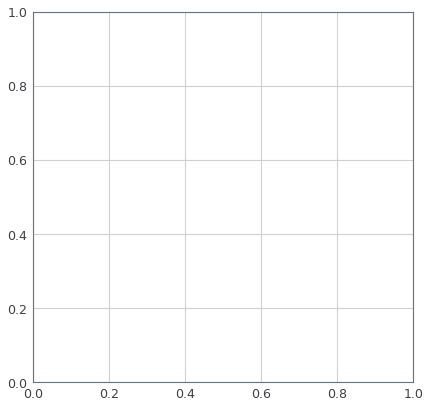

In [3]:
Acc,n_rounds,time_stamps=main(client,w,new,dataset_params,100,e,"balanced")
figure(figsize=(15,15)) 
plt.subplot(221)
plt.plot([i for i in range(n_rounds)], Acc, marker='o')
plt.title('1.1 Accuracy/Rounds for distributed')
plt.subplot(222)
plt.plot([i for i in range(n_rounds)], time_stamps, marker='o')
plt.title('1.2 Time/Rounds for distributed')
plt.legend();
plt.show();

In [ ]:
E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,100,e,"balanced")
plt.plot(Rounds, Acc, marker='o')
plt.title('1.1.a Accuracy/Rounds for distributed')
plt.legend();

In [ ]:
E_real1,Acc_real1=real_partial(100)
len_real1=np.array([i for i in range(len(Acc_real1))])
plt.plot(len_real1,Acc_real1,label="balanced")
plt.title('1.1.a Accuracy/Rounds for centralized')
plt.legend();

### Dataset with no noise flip_y=0
***
#### Balanced
- weights=[0.5,0,5]

In [ ]:
# 3 different e
new="yes"
dataset_params["weights"]=[0.5,0.5]
Bal_acc_e=[]
Bal_rounds_e=[]
bal_e_time=[]

for i in e_array :
    e=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,100,e,"balanced")
    end_time = time.time()
    new="no"
    bal_e_time.append(end_time-start_time)
    Bal_acc_e.append(Acc)
    Bal_rounds_e.append(Rounds)
# 3 different bach_sizes
Bal_acc_b=[]
Bal_rounds_b=[]
bal_b_time=[]

for i in minibaches:
    e=0.01
    batches=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,batches,e,"balanced")
    end_time = time.time()
    bal_b_time.append(end_time-start_time)
    Bal_acc_b.append(Acc)
    Bal_rounds_b.append(Rounds)
    

In [ ]:
E_real1,Acc_real1=real_partial(100)
len_real1=np.array([i for i in range(len(Acc_real1))])


#### Unbalanced
***
- weights=[0.9,0.1]

In [ ]:
# 3 different e
new="yes"
dataset_params["weights"]=[0.9,0.1]
UnBal_acc_e=[]
UnBal_rounds_e=[]
unbal_e_time=[]
for i in e_array:
    e=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,100,e,"Unbalanced")
    end_time = time.time()
    unbal_e_time.append(end_time-start_time)
    new="no"
    UnBal_acc_e.append(Acc)
    UnBal_rounds_e.append(Rounds)
# 3 different bach_sizes
UnBal_acc_b=[]
UnBal_rounds_b=[]
unbal_b_time=[]
for i in minibaches:
    e=0.01
    batches=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,batches,e,"Unbalanced")
    end_time = time.time()
    unbal_b_time.append(end_time-start_time)
    UnBal_acc_b.append(Acc)
    UnBal_rounds_b.append(Rounds)

#### Real

In [ ]:
E_real2,Acc_real2=real_partial(100)
len_real2=np.array([i for i in range(len(Acc_real2))])

### Plots
***
- No noise

In [ ]:
#1.1.a balanced acc-rounds /e (multiple lines one for each e)
figure(figsize=(15,15)) 
plt.subplot(221)
plt.plot(Bal_rounds_e[0], Bal_acc_e[0],label=e_array[0],marker='o')
plt.plot(Bal_rounds_e[1], Bal_acc_e[1],label=e_array[1],marker='o')
plt.plot(Bal_rounds_e[2], Bal_acc_e[2],label=e_array[2],marker='o')
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.1.a Accuracy/Rounds for different e \n in a no noise balanced dataset')
plt.legend();

plt.subplot(222)
plt.plot(Bal_rounds_b[0], Bal_acc_b[0],label=minibaches[0],marker='o')
plt.plot(Bal_rounds_b[1], Bal_acc_b[1],label=minibaches[1],marker='o')
plt.plot(Bal_rounds_b[2], Bal_acc_b[2],label=minibaches[2],marker='o')
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.1.b Accuracy/Rounds for different number of minibatches \n in a no noise balanced dataset')
plt.legend();

#1.2.a unbalanced acc-rounds (multiple lines one for each e)
plt.subplot(223)
plt.plot(UnBal_rounds_e[0], UnBal_acc_e[0],label=e_array[0],marker='o')
plt.plot(UnBal_rounds_e[1], UnBal_acc_e[1],label=e_array[1],marker='o')
plt.plot(UnBal_rounds_e[2], UnBal_acc_e[2],label=e_array[2],marker='o')
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.2.a Accuracy/Rounds for different e \n in a no noise Unbalanced dataset')
plt.legend();

#1.2.b unbalanced acc-rounds /baches (multiple lines)
plt.subplot(224)
plt.plot(UnBal_rounds_b[0], UnBal_acc_b[0],label=minibaches[0],marker='o')
plt.plot(UnBal_rounds_b[1], UnBal_acc_b[1],label=minibaches[1],marker='o')
plt.plot(UnBal_rounds_b[2], UnBal_acc_b[2],label=minibaches[2],marker='o')
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.2.b Accuracy/Rounds for different number of minibatches \n in a no noise Unbalanced dataset')
plt.legend();
name="Plots/Exper_NoNoise_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minibaches_"+str(minibaches)+"_e_"+str(e_array)+"_a.png"
plt.savefig(name)
plt.show();


### Plot centralized 

In [ ]:

plt.plot(len_real1,Acc_real1,label="balanced")
plt.plot(len_real2,Acc_real2,label="unbalanced")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('Centralized behaviour')
plt.legend();
name="Plots/Exper_NoNoise_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minibaches_"+str(minibaches)+"_e_"+str(e_array)+"_b.png"
plt.savefig(name)
plt.show();


### Plot time 

In [ ]:

figure(figsize=(12,5))

plt.subplot(121)
plt.plot(e_array,[x / 60 for x in bal_e_time],label="balanced",marker='D')
plt.plot(e_array,[x / 60 for x in unbal_e_time],label="unbalanced",marker='o')
plt.ylabel("time(m)")
plt.xlabel("e")
plt.title('Time for different e') 
plt.legend();

plt.subplot(122)
plt.plot(minibaches,[x / 60 for x in bal_b_time],label="balanced",marker='D')
plt.plot(minibaches,[x / 60 for x in bal_b_time],label="unbalanced",marker='o')
plt.ylabel("time(m)")
plt.xlabel("Num of minibaches")
plt.title('Time for different minibaches')
plt.legend();
name="Plots/Exper_NoNoise_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minibaches_"+str(minibaches)+"_e_"+str(e_array)+"_c.png"
plt.savefig(name)
plt.show();


### Save results

In [ ]:
f = open("result.txt", "a")
f.writelines(["\n\n\nNEW EXPERIMENT:\nparams:",str(dataset_params),"\nminibaches_size:"
              ,str(minibaches),"\ndifferent e's:",str(e_array),"\nn_workers: ",str(len(w))])
f.writelines(["\n\nRESULTS:\nBal_rounds_e",str(Bal_rounds_e),"\nBal_acc_e",str(Bal_acc_e),
            "\nBal_rounds_b",str(Bal_rounds_b),"\nBal_acc_b",str(Bal_acc_b),"\nUnBal_rounds_e", 
              str(UnBal_rounds_e),"\nUnBal_acc_e",str(UnBal_acc_e),"\nUnBal_rounds_b",
              str(UnBal_rounds_b),"\nBal_acc_b",str(UnBal_acc_b),"\nbal_e_time",str(bal_e_time),
              "\nbal_b_time",str(bal_b_time),"\nunbal_e_time",str(unbal_e_time),
              "\nunbal_b_time",str(unbal_b_time),"\nlen_real1",str(len_real1),
              "\nAcc_real1",str(Acc_real1),"\nlen_real2",str(len_real2),
              "\nAcc_real2",str(Acc_real2)])
f.close()

### Shutdown client

In [ ]:
client.close()
client.shutdown()